<a href="https://colab.research.google.com/github/davideandres95/ml_comm/blob/main/tut01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Tutorial 1: Introduction to Python and Equalizer in Pytorch
October 21st, 2021

In this tutorial, we will introduce the basic principles of Python and Pytorch. 

## Table of Contents


*   1) Python Intro: 
    * Arrays
    * Loops and Conditions
    * Print formatting
    * Plotting
*   2) Pytorch Intro:
    * Tensors
* 3) Equalizer Example



## Jupyter Notebooks

We will use Jupyter Notebooks during the whole semester.

*   Jupyter Notebooks are composed of cells that can contain text (like this cell), images, LaTex, **code**,...
*   Connects to a Python runtime environment in the background to execute code




## 1) Python Intro
### Numpy Arrays

In [1]:
import numpy as np

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print('Visualize the array: ')
print(a)
print('Number of elements in the array: ', a.size)
print('Shape of the array: ', a.shape)
print('Data type of the array: ', a.dtype)

In [ ]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
a.dtype

#### Indexing, Slicing, Reshaping

In [ ]:
print('Access a single element: ', a[1,2])
print('Access a row: ', a[0,:])
print('Access a column: ', a[:,1])

In [ ]:
print(np.reshape(a, (3,2)))
print(np.reshape(a, (-1,6)))

#### Passing by reference

In [ ]:
print('Array a before reference: ', a)
b = a[:,0]
b[:] = 8
print('Array a after reference: ', a)



In [ ]:
# if real copies are needed
a[:,0] = [1, 4] 
b = a[:,0].copy()
b[:] = 8
print(a)

### Loops and conditions
Be careful of the 0-indexing!

In [ ]:
for i in range(5):
    print(i)

In [ ]:
if a[0,0]==0:
    print('first element is zero')
elif a[0,0]==1:
    print('first element is one')
else:
    print('first element is nor zero nor one')
    

### Print formatting
It is important to have feedback from the code.

In [ ]:
n = 10
m = 3
print('The result of the division between {:d} and {:d} is {:.2f}.'.format(n,m,n/m))
print(f'The result of the division between {n :d} and {m :d} is {n/m :.2f}.')

### Plotting

In [ ]:
import matplotlib.pyplot as plt

#### Signal time plot

In [ ]:
t = np.arange(0,10,0.1)
y = np.sin(t)
plt.plot(t,y, label='y=sin(t)')
plt.grid()
plt.xlabel('time t')
plt.legend()

#### Constellation scatterplot

In [ ]:
constellation = [1+1j, -1+1j, -1-1j, 1-1j]
x = np.random.choice(constellation, 1000)
noise = np.random.normal(0, 0.2, size=(1000,)) +  1j* np.random.normal(0, 0.2, size=(1000,))
y = x + noise
plt.scatter(np.real(y), np.imag(y))
plt.scatter(np.real(x), np.imag(x), color='r')
plt.grid()

#### Histogram

In [ ]:
x = np.random.normal(0,1,100000)
plt.hist(x, bins=30);
plt.grid()


## 2) Pytorch Intro
Let's look at some basic manipulations of tensors.

In [2]:
import torch

In [4]:
a = torch.tensor([5., 3.])
print(a)
print(a.dtype)

tensor([5., 3.])
torch.float32


32-bit floating point numbers is the default data type in Pytorch. If desired, it can be overwritten.

In [5]:
a = torch.tensor([5, 3], dtype=torch.int16)
print(a)

tensor([5, 3], dtype=torch.int16)


#### Pass by reference
Numpy's ndarrays and Pytorch's tensors are highly compatible and it is easy to switch between them. 
This is a way to create an object with the same undelying memory. This means that chenges to the new tensor are reflected to the ndarray.

In [6]:
a = np.array([[1,2],[3,4]])
print(a)
b = torch.from_numpy(a[:,0])
print(b)
b[:] = 8
print(a)

[[1 2]
 [3 4]]
tensor([1, 3])
[[8 2]
 [8 4]]


The conversion works also in the other direction, with the same rule.


In [7]:
b = torch.rand(2,3)
print(b)
a = b.numpy()
print(a)

tensor([[0.2275, 0.0531, 0.0097],
        [0.8062, 0.1308, 0.4098]])
[[0.22750545 0.05313653 0.00966662]
 [0.8061729  0.13081694 0.40975493]]


#### Copy from NumPy
If we do not wish the two objects to use the same undelying memory, torch.tensor() creates a copy of the data.

In [ ]:
a = np.array([[1,2],[3,4]])
b = torch.tensor(a)
print(b)
b[0,0]=8
print(a)

#### Maths 
Tensors performs mathematic and arithmetic operations intuitively, and very similar to Numpy.

In [ ]:
ones = torch.ones(2,3)
print(ones)
twos = ones * 2
print(twos)
threes = ones + twos
print(threes)

In [ ]:
m = torch.rand((10,10)) # matrix of random numbers between 0 and 1
print('Max value of the matrix: ', torch.max(m))
print('Mean value of the matrix: ', torch.mean(m))
print('Determinant of the matrix: ', torch.det(m))

## 3) Equalizer example

In [9]:
from torch import nn, optim
import matplotlib.pyplot as plt

In [10]:
def downsample_td(signal, down):
    assert len(signal.shape)==2, 'signal format [number_dimensions][signal_length] expected'
    return down * signal[:, ::down]

In [11]:
# Initialize Filter
num_taps = 41
nn_filter = nn.Conv1d (in_channels=1 ,
                       out_channels=1 ,
                       kernel_size=num_taps,
                       padding='same' )

In [26]:
# Import data
# https://drive.google.com/file/d/18wBNg-3RH0waZ-PhJAsrS99PrqOODKYU/view?usp=sharing
# https://drive.google.com/file/d/1a3f16dFKTgr_K7zKCZfLIaZYfAz0__Cd/view?usp=sharing
!wget -O x.txt "https://drive.google.com/uc?export=download&id=18wBNg-3RH0waZ-PhJAsrS99PrqOODKYU"
!wget -O y.txt "https://drive.google.com/uc?export=download&id=1a3f16dFKTgr_K7zKCZfLIaZYfAz0__Cd"

--2021-12-02 12:26:28--  https://drive.google.com/uc?export=download&id=18wBNg-3RH0waZ-PhJAsrS99PrqOODKYU
Resolving drive.google.com (drive.google.com)... 2a00:1450:4016:808::200e, 142.251.36.174
Connecting to drive.google.com (drive.google.com)|2a00:1450:4016:808::200e|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d4dk75ijojc5dk85hrfbqbk77n8t9aqa/1638444375000/12991615840348699698/*/18wBNg-3RH0waZ-PhJAsrS99PrqOODKYU?e=download [following]
--2021-12-02 12:26:29--  https://doc-0c-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d4dk75ijojc5dk85hrfbqbk77n8t9aqa/1638444375000/12991615840348699698/*/18wBNg-3RH0waZ-PhJAsrS99PrqOODKYU?e=download
Resolving doc-0c-24-docs.googleusercontent.com (doc-0c-24-docs.googleusercontent.com)... 2a00:1450:4016:809::2001, 142.251.36.193
Connecting to doc-0c-24-docs.googleusercontent.com (doc-0

In [13]:
# Prepare data
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
y_t = torch.Tensor(y.reshape(1, 1, -1))
x_t = torch.Tensor(x.reshape(1, -1))

In [21]:
# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(nn_filter.parameters())

In [22]:
[p for p in nn_filter.parameters()]

[Parameter containing:
 tensor([[[-0.0692,  0.0177,  0.1310,  0.0047,  0.0676,  0.0065, -0.1081,
           -0.0537, -0.0231, -0.0037, -0.0628,  0.1438,  0.0330, -0.0622,
            0.0337, -0.0726, -0.0469, -0.0779,  0.0354, -0.1058,  0.0141,
           -0.1159,  0.0701, -0.0715, -0.0143,  0.0981,  0.0404,  0.0840,
            0.0337, -0.0128, -0.0864,  0.0468, -0.1498, -0.0626,  0.0799,
           -0.0996,  0.0312,  0.0607, -0.0237, -0.0053,  0.0332]]],
        requires_grad=True),
 Parameter containing:
 tensor([0.1479], requires_grad=True)]

In [23]:
# Trainings loop
for j in range(1000):
    x_hat = nn_filter(y_t).reshape(1, -1)
    x_hat = downsample_td(x_hat, 2)
    loss = loss_fn(x_hat, x_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if j % 50 == 0:
        print(f'epoch {j}: Loss = {loss.detach().numpy() :.4f}')

epoch 0: Loss = 6.9629
epoch 50: Loss = 4.7898
epoch 100: Loss = 3.3833
epoch 150: Loss = 2.3663
epoch 200: Loss = 1.6268
epoch 250: Loss = 1.0970
epoch 300: Loss = 0.7257
epoch 350: Loss = 0.4717
epoch 400: Loss = 0.3022
epoch 450: Loss = 0.1918
epoch 500: Loss = 0.1215
epoch 550: Loss = 0.0775
epoch 600: Loss = 0.0505
epoch 650: Loss = 0.0340
epoch 700: Loss = 0.0240
epoch 750: Loss = 0.0179
epoch 800: Loss = 0.0141
epoch 850: Loss = 0.0117
epoch 900: Loss = 0.0101
epoch 950: Loss = 0.0089


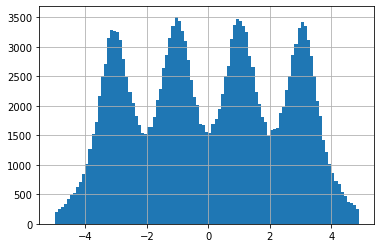

In [24]:
plt.hist(downsample_td(y.reshape(1,-1), 2).reshape(-1), bins=np.arange(-5, 5, 0.1))
plt.grid()

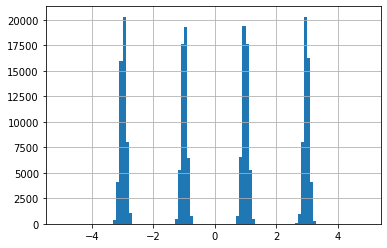

In [25]:
plt.hist(x_hat.detach().numpy().reshape(-1), bins=np.arange(-5, 5, 0.1));
plt.grid()